In [2]:
library(ggplot2)
library(tidyverse)
library(readxl)
library(MicrobeR)
library(vegan)

In [3]:
md<-read.csv('data-for-div-foldchange-withhp.csv',row.names=1) %>% rownames_to_column("SampleID") 
row.names(md)<-md$SampleID
head(md)

,SampleID,Age,BMI,BioProject,CagA,Center_Name,Collection_Date,Condition,Country,Diagnosis,⋯,hp_relative_abundance,observed_otus,paried.sample,pielou_e,primer,sampleloc,sampling_method,shannon,smoker,Diag_order
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
ERR1995049,ERR1995049,NA,,PRJEB21104,,CGR,,gastric cancer,United Kingdom,gastric cancer,⋯,78.20510135,118,,0.45590514,27F _388R,,gastric mucosa biopsy,3.1378323,,D
ERR1995038,ERR1995038,NA,,PRJEB21104,,CGR,,gastric cancer,United Kingdom,gastric cancer,⋯,11.57239357,91,,0.62164375,27F _388R,,gastric mucosa biopsy,4.0455299,,D
ERR1995100,ERR1995100,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.07878151,217,,0.84573990,27F _388R,,gastric mucosa biopsy,6.5642536,,A
ERR1995099,ERR1995099,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.15202189,181,,0.85661812,27F _388R,,gastric mucosa biopsy,6.4245039,,A
ERR1995073,ERR1995073,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.00000000,199,,0.78710595,27F _388R,,gastric mucosa biopsy,6.0108327,,A
ERR1994996,ERR1994996,NA,,PRJEB21104,,CGR,,H.pylori gastritis,United Kingdom,gastritis,⋯,99.82093294,5,,0.01547059,27F _388R,,gastric mucosa biopsy,0.0359216,,B


In [4]:
table(md$Diagnosis)


       gastric cancer             gastritis               healthy 
                 1301                   489                    97 
intestinal metaplasia 
                  208 

In [5]:
md[which(md$Diagnosis=='intestinal metaplasia'),'Diagnosis'] <-'intestinal_metaplasia'
head(md)

,SampleID,Age,BMI,BioProject,CagA,Center_Name,Collection_Date,Condition,Country,Diagnosis,⋯,hp_relative_abundance,observed_otus,paried.sample,pielou_e,primer,sampleloc,sampling_method,shannon,smoker,Diag_order
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
ERR1995049,ERR1995049,NA,,PRJEB21104,,CGR,,gastric cancer,United Kingdom,gastric cancer,⋯,78.20510135,118,,0.45590514,27F _388R,,gastric mucosa biopsy,3.1378323,,D
ERR1995038,ERR1995038,NA,,PRJEB21104,,CGR,,gastric cancer,United Kingdom,gastric cancer,⋯,11.57239357,91,,0.62164375,27F _388R,,gastric mucosa biopsy,4.0455299,,D
ERR1995100,ERR1995100,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.07878151,217,,0.84573990,27F _388R,,gastric mucosa biopsy,6.5642536,,A
ERR1995099,ERR1995099,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.15202189,181,,0.85661812,27F _388R,,gastric mucosa biopsy,6.4245039,,A
ERR1995073,ERR1995073,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.00000000,199,,0.78710595,27F _388R,,gastric mucosa biopsy,6.0108327,,A
ERR1994996,ERR1994996,NA,,PRJEB21104,,CGR,,H.pylori gastritis,United Kingdom,gastritis,⋯,99.82093294,5,,0.01547059,27F _388R,,gastric mucosa biopsy,0.0359216,,B


In [6]:
md[which(md$Diagnosis=='gastric cancer'),'Diagnosis'] <-'gastric_cancer'
head(md)

,SampleID,Age,BMI,BioProject,CagA,Center_Name,Collection_Date,Condition,Country,Diagnosis,⋯,hp_relative_abundance,observed_otus,paried.sample,pielou_e,primer,sampleloc,sampling_method,shannon,smoker,Diag_order
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
ERR1995049,ERR1995049,NA,,PRJEB21104,,CGR,,gastric cancer,United Kingdom,gastric_cancer,⋯,78.20510135,118,,0.45590514,27F _388R,,gastric mucosa biopsy,3.1378323,,D
ERR1995038,ERR1995038,NA,,PRJEB21104,,CGR,,gastric cancer,United Kingdom,gastric_cancer,⋯,11.57239357,91,,0.62164375,27F _388R,,gastric mucosa biopsy,4.0455299,,D
ERR1995100,ERR1995100,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.07878151,217,,0.84573990,27F _388R,,gastric mucosa biopsy,6.5642536,,A
ERR1995099,ERR1995099,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.15202189,181,,0.85661812,27F _388R,,gastric mucosa biopsy,6.4245039,,A
ERR1995073,ERR1995073,NA,,PRJEB21104,,CGR,,healthy,United Kingdom,healthy,⋯,0.00000000,199,,0.78710595,27F _388R,,gastric mucosa biopsy,6.0108327,,A
ERR1994996,ERR1994996,NA,,PRJEB21104,,CGR,,H.pylori gastritis,United Kingdom,gastritis,⋯,99.82093294,5,,0.01547059,27F _388R,,gastric mucosa biopsy,0.0359216,,B


In [7]:
dim(md)

[1] 2095   58

In [8]:
alphas<-c('shannon','faith_pd', 'observed_otus')

In [9]:
unique(md$BioProject)

[1] "PRJEB21104"  "PRJEB21497"  "PRJEB22107"  "PRJEB26931"  "PRJNA310127"
[6] "PRJNA428883" "PRJNA375772" "PRJNA495436" "PRJNA481413"

In [10]:
Hcolor="#E69F00"
Lcolor="#0072B2"

In [11]:
table(md$Condition)


         atrophic gastritis           chronic gastritis 
                        117                          41 
       functional dyspepsia              gastric cancer 
                         18                        1012 
   gastric noncardia cancer                   gastritis 
                        289                         157 
H.pylori atrophic gastritis          H.pylori gastritis 
                         11                          21 
                    healthy       intestinal metaplasia 
                         79                         208 
      superficial gastritis 
                        142 

In [12]:
md <- subset(md,Condition!='atrophic gastritis') %>%subset(Condition!='H.pylori atrophic gastritis')

## healthy vs gastritis

In [13]:
Project=c('PRJEB21104','PRJEB22107','PRJEB26931')

In [14]:
Alpha_stat<- function(p){


    As <-list()

    As$md <-subset(md,bioproject==p) %>% subset(Diagnosis=='healthy'| Diagnosis=='gastritis')

    for (Alpha in alphas){
        min_alpha=min(As$md[which(As$md[Alpha]!=0),Alpha])
        As$md[which(As$md[Alpha]==0),Alpha]<- min_alpha 
    }


    As$alpha_div <- As$md %>%
    as_tibble() %>%  
    gather( key="Metric", value="Diversity",shannon,faith_pd, observed_otus) %>% 
    select(SampleID,BioProject, Diagnosis, Metric, Diversity)
    #alpha_div

    As$alpha_div <- As$alpha_div %>%
    left_join(
        As$alpha_div %>%
        group_by(Metric, Diagnosis) %>%
        summarize(mean=mean(log2(Diversity))) %>%  
       spread(key=Diagnosis, value=mean) %>%
       rename(mean_log2HC=healthy, mean_log2CG=gastritis) #*
    ) %>%

    mutate(log2FC=log2(Diversity)-mean_log2HC)



    As$AlphaDiversity_Stats <-
    As$alpha_div %>%
    group_by(Metric) %>% 
    do(
      broom::tidy(t.test(log2FC~Diagnosis, data=., conf.int=TRUE, conf.level=0.95))
    ) %>%
    mutate(BioProject= p) %>%
    select(BioProject, Metric, log2FC=estimate, Pvalue=p.value, 
           mean_HC=estimate2, mean_CG=estimate1, CI_low=conf.low, CI_high=conf.high) 

    return(As)
}

In [15]:
PerStudy<-list()
  for(p in Project){
    message("--------------------->", p)
    PerStudy[[p]]<-Alpha_stat(p)
  }

--------------------->PRJEB21104

`summarise()` has grouped output by 'Metric'. You can override using the
`.groups` argument.
Joining, by = "Metric"
--------------------->PRJEB22107

`summarise()` has grouped output by 'Metric'. You can override using the
`.groups` argument.
Joining, by = "Metric"
--------------------->PRJEB26931

`summarise()` has grouped output by 'Metric'. You can override using the
`.groups` argument.
Joining, by = "Metric"


In [16]:
mod<-lapply(PerStudy, function(x) x$alpha_div) %>%
  do.call(bind_rows, .) %>%
  mutate(Diagnosis=factor(Diagnosis, levels=c("healthy","gastritis"))) %>% #*
  group_by(Metric)

AlphaCombined<-tibble(BioProject=character(0), Metric=character(0), 
                      log2FC=numeric(0), Pvalue=numeric(0), mean_HC=numeric(0), 
                      mean_CG=numeric(0), CI_low=numeric(0), CI_high=numeric(0))

for(i in unique(mod$Metric)){
  fit<-lmerTest:::lmer(log2FC~Diagnosis+(1|BioProject), data=subset(mod, Metric==i))
  cf<-confint(fit,level = 0.95)
  
  AlphaCombined<-bind_rows(AlphaCombined, tibble(
    BioProject="Combined", 
    Metric=i, 
    log2FC=summary(fit)$coefficients["Diagnosisgastritis", "Estimate"],  
    Pvalue=anova(fit)$`Pr(>F)`, 
    mean_HC=NA, 
    mean_CG=NA, 
    CI_low=cf["Diagnosisgastritis",1],  
    CI_high=cf["Diagnosisgastritis",2] 
  ))
}

Computing profile confidence intervals ...

Computing profile confidence intervals ...

Computing profile confidence intervals ...



In [17]:
set_front <- function (size=9){
    theme(axis.text.x=element_text(angle=45, hjust=1,size=size),
          axis.text.y=element_text(size=size),
      axis.text = element_text(size = size,colour = 'black'),
      legend.title = element_text(size = size),
     legend.text = element_text(size = size),
     strip.text = element_text(size = size))
    
}    

In [18]:
NSamples<-
  lapply(names(PerStudy), function(x) tibble(BioProject=x, Nsamples=length(unique(PerStudy[[x]]$alpha_div$SampleID)))) %>% 
  do.call(bind_rows, .) %>% 
  arrange(desc(Nsamples)) %>% 
  mutate(Study=paste0(BioProject, " (n=", Nsamples,")")) %>% 
  bind_rows(tibble(BioProject="Combined", Study="Combined")) %>%
  mutate(Study=factor(Study, levels=rev(Study)))
  #mutate(Study=factor(Study, levels=c('PRJEB21104','PRJEB22107','PRJEB26931','Combined')))       

res<- lapply(PerStudy, function(x) x$AlphaDiversity_Stats) %>%
do.call(bind_rows, .) %>%
bind_rows(AlphaCombined) %>%
mutate(Significant=case_when(
Pvalue<0.05 & log2FC>0 ~ "* higher in gastritis",
Pvalue<0.05 & log2FC<0 ~ "* higher in healthy",
TRUE~"ns"
)) %>%
ungroup() %>%
mutate(Metric=factor(Metric, levels=alphas))%>%
#mutate(BioProject=factor(BioProject, levels=c('PRJEB21104','PRJEB22107','PRJEB26931','Combined')))%>%           
left_join(NSamples) 

Joining, by = "BioProject"



In [19]:
res <- res %>% mutate(Metric = recode(Metric,'shannon'='Shannon',
                     'faith_pd'="Faith's PD",'observed_otus'='Observed ASVs'))

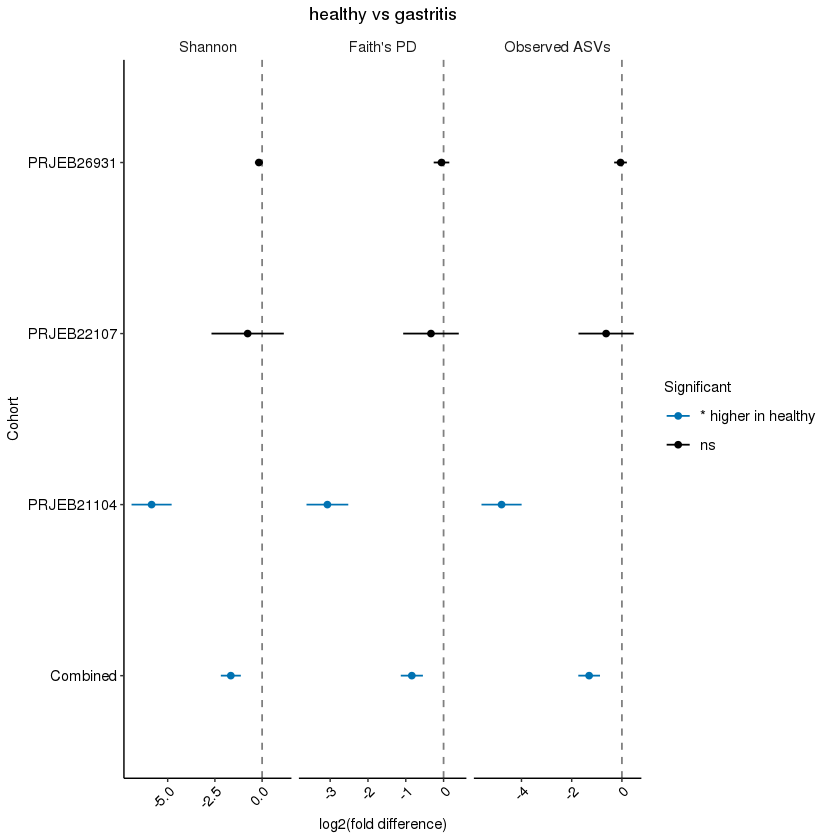

In [20]:
res <- res %>% mutate(Metric = recode(Metric,'shannon'='Shannon',
                     'faith_pd'="Faith's PD",'observed_otus'='Observed ASVs'))

ggplot(res,aes(x=log2FC, y=BioProject, color=Significant)) +  
geom_vline(xintercept = 0, linetype="dashed", color="grey50") +
geom_errorbarh(aes(xmin=CI_low, xmax=CI_high), height=0 ) +
geom_point() +
facet_grid(~Metric, scales="free_x") +
theme_MicrobeR() +
scale_color_manual(values=c(Lcolor, "black"))  +
theme(panel.border = element_blank(), axis.line = element_line(),
      plot.title = element_text(hjust = 0.5)) + 
             set_front(9)+xlab('log2(fold difference)')+
labs(title="healthy vs gastritis",y='Cohort')
             
ggsave("figures/healthy_vs_CG_forestplot_withhp.pdf", device="pdf", height=2.5, width=5.5, useDingbats=F)
write.csv(res,'healthy_vs_CG_logFC_result_withhp.csv')

In [22]:
hg <- res
hg

BioProject,Metric,log2FC,Pvalue,mean_HC,mean_CG,CI_low,CI_high,Significant,Nsamples,Study
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<fct>
PRJEB21104,Faith's PD,-3.07325893,3.476433e-11,1.567382e-16,-3.07325893,-3.6255537,-2.52096414,* higher in healthy,38,PRJEB21104 (n=38)
PRJEB21104,Observed ASVs,-4.79373436,1.031158e-11,-4.179727e-16,-4.79373436,-5.5931821,-3.99428661,* higher in healthy,38,PRJEB21104 (n=38)
PRJEB21104,Shannon,-5.85113845,8.907160e-11,-7.835792e-17,-5.85113845,-6.9126968,-4.78958012,* higher in healthy,38,PRJEB21104 (n=38)
PRJEB22107,Faith's PD,-0.33323723,3.321939e-01,2.220446e-16,-0.33323723,-1.0686143,0.40213984,ns,26,PRJEB22107 (n=26)
PRJEB22107,Observed ASVs,-0.62911246,2.320040e-01,2.960595e-16,-0.62911246,-1.7298767,0.47165178,ns,26,PRJEB22107 (n=26)
PRJEB22107,Shannon,-0.76567289,3.833594e-01,9.253666e-17,-0.76567289,-2.6802613,1.14891548,ns,26,PRJEB22107 (n=26)
PRJEB26931,Faith's PD,-0.05504591,5.977499e-01,-9.515617e-17,-0.05504591,-0.2614608,0.15136902,ns,97,PRJEB26931 (n=97)
PRJEB26931,Observed ASVs,-0.05585266,6.619069e-01,-7.928725e-17,-0.05585266,-0.3087443,0.19703903,ns,97,PRJEB26931 (n=97)
PRJEB26931,Shannon,-0.16980484,1.152976e-01,-5.947599e-17,-0.16980484,-0.3819048,0.04229514,ns,97,PRJEB26931 (n=97)


## healthy vs GC

In [23]:
Project=c('PRJEB21104','PRJEB21497','PRJEB26931')

In [24]:
Alpha_stat<- function(p){


    As <-list()

    As$md <-subset(md,bioproject==p) %>% subset(Diagnosis=='healthy'| Diagnosis=='gastric_cancer') #*

    for (Alpha in alphas){
        min_alpha=min(As$md[which(As$md[Alpha]!=0),Alpha])
        As$md[which(As$md[Alpha]==0),Alpha]<- min_alpha 
    }


    As$alpha_div <- As$md %>%
    as_tibble() %>%  
    gather( key="Metric", value="Diversity",shannon,faith_pd, observed_otus) %>% #wide to long
    select(SampleID,BioProject, Diagnosis, Metric, Diversity)
    

    As$alpha_div <- As$alpha_div %>%
    left_join(
        As$alpha_div %>%
        group_by(Metric, Diagnosis) %>%
        summarize(mean=mean(log2(Diversity))) %>%  
       spread(key=Diagnosis, value=mean) %>%
       rename(mean_log2HC=healthy, mean_log2GC=gastric_cancer)  
    ) %>%

    mutate(log2FC=log2(Diversity)-mean_log2HC) 



    As$AlphaDiversity_Stats <-
    As$alpha_div %>%
    group_by(Metric) %>% 
    do(
      broom::tidy(t.test(log2FC~Diagnosis, data=., conf.int=TRUE, conf.level=0.95))
    ) %>%
    mutate(BioProject= p) %>%
    select(BioProject, Metric, log2FC=estimate, Pvalue=p.value, 
           mean_HC=estimate2, mean_GC=estimate1, CI_low=conf.low, CI_high=conf.high) 

    return(As)
}

In [25]:
PerStudy<-list()
  for(p in Project){
    message("--------------------->", p)
    PerStudy[[p]]<-Alpha_stat(p)
  }

--------------------->PRJEB21104

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJEB21497

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJEB26931

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"



In [26]:
mod<-lapply(PerStudy, function(x) x$alpha_div) %>%
  do.call(bind_rows, .) %>%
  mutate(Diagnosis=factor(Diagnosis, levels=c("healthy","gastric_cancer"))) %>% 
  group_by(Metric)

AlphaCombined<-tibble(BioProject=character(0), Metric=character(0), log2FC=numeric(0), 
                      Pvalue=numeric(0), mean_HC=numeric(0), mean_GC=numeric(0), 
                      CI_low=numeric(0), CI_high=numeric(0))  
#AlphaCombined
for(i in unique(mod$Metric)){
  fit<-lmerTest:::lmer(log2FC~Diagnosis+(1|BioProject), data=subset(mod, Metric==i))
  cf<-confint(fit,level = 0.95)
  
  AlphaCombined<-bind_rows(AlphaCombined, tibble(
    BioProject="Combined", 
    Metric=i, 
    log2FC=summary(fit)$coefficients["Diagnosisgastric_cancer", "Estimate"],  
    Pvalue=anova(fit)$`Pr(>F)`,  
    mean_HC=NA, 
    mean_GC=NA, 
    CI_low=cf["Diagnosisgastric_cancer",1],
    CI_high=cf["Diagnosisgastric_cancer",2] 
  ))
}

Computing profile confidence intervals ...

Computing profile confidence intervals ...

Computing profile confidence intervals ...



In [27]:
NSamples<-
  lapply(names(PerStudy), function(x) tibble(BioProject=x, Nsamples=length(unique(PerStudy[[x]]$alpha_div$SampleID)))) %>% 
  do.call(bind_rows, .) %>% 
  arrange(desc(Nsamples)) %>% 
  mutate(Study=paste0(BioProject, " (n=", Nsamples,")")) %>% 
  bind_rows(tibble(BioProject="Combined", Study="Combined")) %>%
  mutate(Study=factor(Study, levels=rev(Study)))
         

res<- lapply(PerStudy, function(x) x$AlphaDiversity_Stats) %>%
do.call(bind_rows, .) %>%
bind_rows(AlphaCombined) %>%
mutate(Significance=case_when(
Pvalue<0.05 & log2FC>0 ~ "* higher in GC",
Pvalue<0.05 & log2FC<0 ~ "* higher in healthy",
TRUE~"ns"
)) %>%
ungroup() %>%
mutate(Metric=factor(Metric, levels=alphas))%>%
left_join(NSamples) 
       


Joining, by = "BioProject"



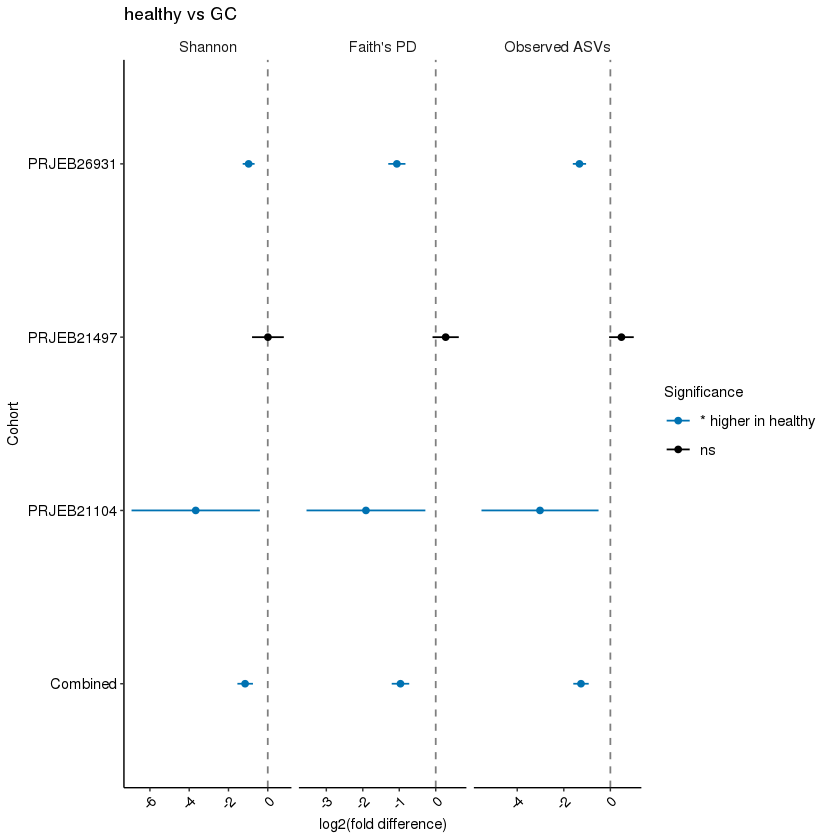

In [28]:
res <- res %>% mutate(Metric = recode(Metric,'shannon'='Shannon',
                     'faith_pd'="Faith's PD",'observed_otus'='Observed ASVs'))

ggplot(res,aes(x=log2FC, y=BioProject, color=Significance)) +  
geom_vline(xintercept = 0, linetype="dashed", color="grey50") +
geom_errorbarh(aes(xmin=CI_low, xmax=CI_high), height=0 ) +
geom_point() +
facet_grid(~Metric, scales="free_x") +
theme_MicrobeR() +
scale_color_manual(values=c(Lcolor, "black"))  +
theme(panel.border = element_blank(), axis.line = element_line()) +
# theme(axis.text.x=element_text(angle=45, hjust=1,size=7),
#       axis.text = element_text(size = 9,colour = 'black'))+
             labs(title='healthy vs GC',y='Cohort')+set_front(9)+xlab('log2(fold difference)')

ggsave("figures/healthy_vs_GC_forestplot_withhp.pdf", device="pdf", height=2.5, width=5.5, useDingbats=F)
write.csv(res,'healthy_vs_GC_logFC_result_withhp.csv')

In [30]:
hgc <-res
hgc

BioProject,Metric,log2FC,Pvalue,mean_HC,mean_GC,CI_low,CI_high,Significance,Nsamples,Study
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<fct>
PRJEB21104,Faith's PD,-1.913725078,2.660363e-02,1.567382e-16,-1.913725078,-3.54311413,-0.2843360,* higher in healthy,26,PRJEB21104 (n=26)
PRJEB21104,Observed ASVs,-3.021344857,2.412658e-02,-4.179727e-16,-3.021344857,-5.53482433,-0.5078654,* higher in healthy,26,PRJEB21104 (n=26)
PRJEB21104,Shannon,-3.669099592,3.207839e-02,-7.835792e-17,-3.669099592,-6.93637512,-0.4018241,* higher in healthy,26,PRJEB21104 (n=26)
PRJEB21497,Faith's PD,0.271960900,1.310435e-01,-1.850372e-16,0.271960900,-0.08807381,0.6319956,ns,30,PRJEB21497 (n=30)
PRJEB21497,Observed ASVs,0.475331090,7.576414e-02,-1.973971e-16,0.475331090,-0.05367791,1.0043401,ns,30,PRJEB21497 (n=30)
PRJEB21497,Shannon,0.008523685,9.827865e-01,-5.551115e-17,0.008523685,-0.80033370,0.8173811,ns,30,PRJEB21497 (n=30)
PRJEB26931,Faith's PD,-1.065953500,2.159380e-15,-9.515617e-17,-1.065953500,-1.30131075,-0.8305963,* higher in healthy,140,PRJEB26931 (n=140)
PRJEB26931,Observed ASVs,-1.327806075,4.844665e-16,-7.928725e-17,-1.327806075,-1.61282539,-1.0427868,* higher in healthy,140,PRJEB26931 (n=140)
PRJEB26931,Shannon,-0.973650583,3.187014e-09,-5.947599e-17,-0.973650583,-1.27653121,-0.6707700,* higher in healthy,140,PRJEB26931 (n=140)


## gastritis vs IM

In [31]:
table(md$bioproject)


                PRJEB21104                 PRJEB21497 
                        54                         30 
                PRJEB22107                 PRJEB26931 
                        26                        235 
         PRJNA310127_China         PRJNA310127_Mexico 
                       154                        123 
PRJNA375772_Inner_Mongolia          PRJNA375772_Xi_an 
                        92                        135 
               PRJNA428883                PRJNA481413 
                       705                        285 
 PRJNA481413 gastric fluid                PRJNA495436 
                        96                         32 

In [32]:
Project=c('PRJEB21104','PRJEB26931','PRJNA375772_Xi_an','PRJNA481413')

In [33]:
table(md$Diagnosis)


       gastric_cancer             gastritis               healthy 
                 1301                   361                    97 
intestinal_metaplasia 
                  208 

In [34]:
Alpha_stat<- function(p){


    As <-list()

    As$md <-subset(md,bioproject==p) %>% subset(Diagnosis=='gastritis'| Diagnosis=='intestinal_metaplasia') %>%
    mutate(Diagnosis=factor(Diagnosis, levels=c("intestinal_metaplasia","gastritis")))
    for (Alpha in alphas){
        min_alpha=min(As$md[which(As$md[Alpha]!=0),Alpha])
        As$md[which(As$md[Alpha]==0),Alpha]<- min_alpha 
    }


    As$alpha_div <- As$md %>%
    as_tibble() %>%  
    gather( key="Metric", value="Diversity",shannon,faith_pd, observed_otus) %>% 
    select(SampleID,BioProject, Diagnosis, Metric, Diversity)
    

    As$alpha_div <- As$alpha_div %>%
    left_join(
        As$alpha_div %>%
        group_by(Metric, Diagnosis) %>%
        summarize(mean=mean(log2(Diversity))) %>%  
       spread(key=Diagnosis, value=mean) %>%
       rename(mean_log2CG=gastritis, mean_log2IM=intestinal_metaplasia)  
    ) %>%

    #mutate(log2FC=log2(Diversity)-mean_log2CG) 
    mutate(log2FC=log2(Diversity)-mean_log2CG)


    As$AlphaDiversity_Stats <-
    As$alpha_div %>%
    group_by(Metric) %>% 
    do(
      broom::tidy(t.test(log2FC~Diagnosis, data=., conf.int=TRUE, conf.level=0.95))
    ) %>%
    mutate(BioProject= p) %>%
    select(BioProject, Metric, log2FC=estimate, Pvalue=p.value, 
           mean_CG=estimate2, mean_IM=estimate1, CI_low=conf.low, CI_high=conf.high)

    return(As)
}

In [35]:
PerStudy<-list()
  for(p in Project){
    message("--------------------->", p)
    PerStudy[[p]]<-Alpha_stat(p)
  }

--------------------->PRJEB21104

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJEB26931

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJNA375772_Xi_an

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJNA481413

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"



In [36]:
PerStudy$PRJEB26931$AlphaDiversity_Stats

BioProject,Metric,log2FC,Pvalue,mean_CG,mean_IM,CI_low,CI_high
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PRJEB26931,faith_pd,-0.14597658,0.09535703,-3.791243e-16,-0.14597658,-0.3180856,0.02613243
PRJEB26931,observed_otus,-0.18130875,0.12276968,3.899743e-16,-0.18130875,-0.4126459,0.05002840
PRJEB26931,shannon,-0.04877504,0.57078536,-1.623527e-17,-0.04877504,-0.2194607,0.12191059


In [37]:
mod<-lapply(PerStudy, function(x) x$alpha_div) %>%
  do.call(bind_rows, .) %>%
  mutate(Diagnosis=factor(Diagnosis, levels=c("gastritis","intestinal_metaplasia"))) %>% 
  group_by(Metric)

AlphaCombined<-tibble(BioProject=character(0), Metric=character(0), log2FC=numeric(0), 
                      Pvalue=numeric(0), mean_CG=numeric(0), mean_IM=numeric(0), 
                      CI_low=numeric(0), CI_high=numeric(0))  
#AlphaCombined
for(i in unique(mod$Metric)){
  fit<-lmerTest:::lmer(log2FC~Diagnosis+(1|BioProject), data=subset(mod, Metric==i))
  cf<-confint(fit,level = 0.95)
  
  AlphaCombined<-bind_rows(AlphaCombined, tibble(
    BioProject="Combined", 
    Metric=i, 
    log2FC=summary(fit)$coefficients["Diagnosisintestinal_metaplasia", "Estimate"],  
    Pvalue=anova(fit)$`Pr(>F)`,  
    mean_CG=NA, 
    mean_IM=NA, 
    CI_low=cf["Diagnosisintestinal_metaplasia",1], 
    CI_high=cf["Diagnosisintestinal_metaplasia",2] 
  ))
}

boundary (singular) fit: see ?isSingular

Computing profile confidence intervals ...

boundary (singular) fit: see ?isSingular

Computing profile confidence intervals ...

boundary (singular) fit: see ?isSingular

Computing profile confidence intervals ...



In [38]:
NSamples<-
  lapply(names(PerStudy), function(x) tibble(BioProject=x, Nsamples=length(unique(PerStudy[[x]]$alpha_div$SampleID)))) %>% 
  do.call(bind_rows, .) %>% 
  arrange(desc(Nsamples)) %>% 
  mutate(Study=paste0(BioProject, " (n=", Nsamples,")")) %>% 
  bind_rows(tibble(BioProject="Combined", Study="Combined")) %>%
  mutate(Study=factor(Study, levels=rev(Study)))
         

res<- lapply(PerStudy, function(x) x$AlphaDiversity_Stats) %>%
do.call(bind_rows, .) %>%
bind_rows(AlphaCombined) %>%
mutate(Significance=case_when(
Pvalue<0.05 & log2FC>0 ~ "* higher in IM",
Pvalue<0.05 & log2FC<0 ~ "* higher in gastritis",
TRUE~"ns"
)) %>%
ungroup() %>%
mutate(Metric=factor(Metric, levels=alphas))%>%
left_join(NSamples) 
       
         

Joining, by = "BioProject"



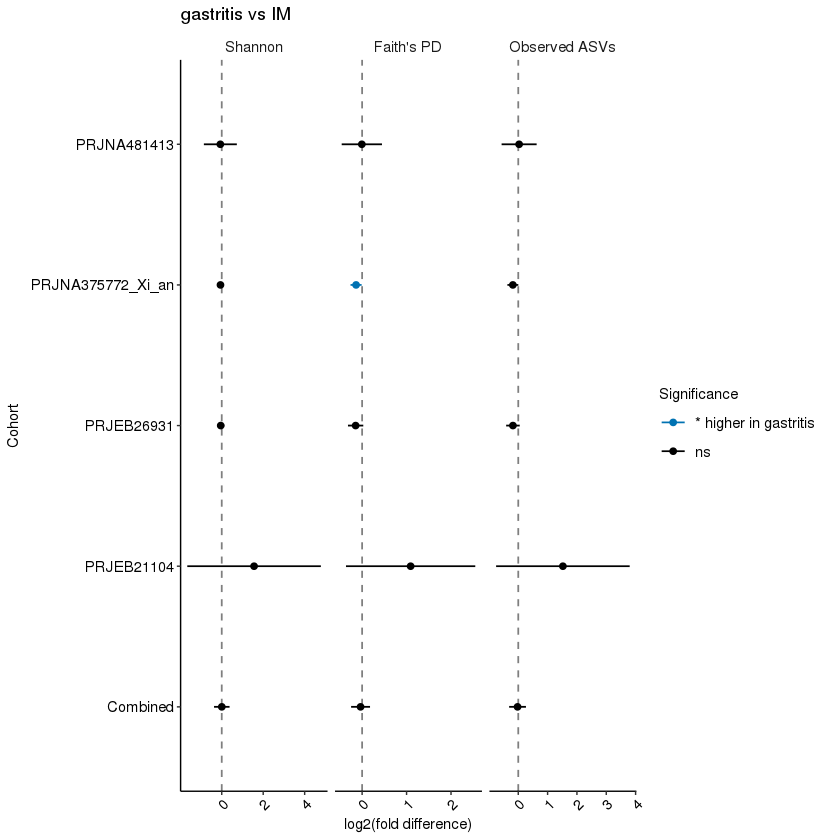

In [39]:
res <- res %>% mutate(Metric = recode(Metric,'shannon'='Shannon',
                     'faith_pd'="Faith's PD",'observed_otus'='Observed ASVs'))

ggplot(res,aes(x=log2FC, y=BioProject, color=Significance)) +  
geom_vline(xintercept = 0, linetype="dashed", color="grey50") +
geom_errorbarh(aes(xmin=CI_low, xmax=CI_high), height=0 ) +
geom_point() +
facet_grid(~Metric, scales="free_x") +
theme_MicrobeR() +
scale_color_manual(values=c(Lcolor, "black"))  +
theme(panel.border = element_blank(), axis.line = element_line()) +
# theme(axis.text.x=element_text(angle=45, hjust=1,size=7),
#       axis.text = element_text(size = 9,colour = 'black'))+
             labs(title='gastritis vs IM',y='Cohort')+set_front(9)+xlab('log2(fold difference)')

ggsave("figures/gastritis_vs_IM_forestplot_withhp.pdf", device="pdf", height=2.8, width=5.9, useDingbats=F)
write.csv(res,'gastritis_vs_IM_logFC_result_withhp.csv')   

In [42]:
gim <- res

## gastritis vs GC

In [43]:
table(md$bioproject)


                PRJEB21104                 PRJEB21497 
                        54                         30 
                PRJEB22107                 PRJEB26931 
                        26                        235 
         PRJNA310127_China         PRJNA310127_Mexico 
                       154                        123 
PRJNA375772_Inner_Mongolia          PRJNA375772_Xi_an 
                        92                        135 
               PRJNA428883                PRJNA481413 
                       705                        285 
 PRJNA481413 gastric fluid                PRJNA495436 
                        96                         32 

In [44]:
Project<-c('PRJEB21104','PRJEB26931','PRJNA375772_Inner_Mongolia','PRJNA375772_Xi_an',
'PRJNA481413')

In [45]:
Alpha_stat<- function(p){


    As <-list()

    As$md <-subset(md,bioproject==p) %>% subset(Diagnosis=='gastritis'| Diagnosis=='gastric_cancer')

    for (Alpha in alphas){
        min_alpha=min(As$md[which(As$md[Alpha]!=0),Alpha])
        As$md[which(As$md[Alpha]==0),Alpha]<- min_alpha 
    }


    As$alpha_div <- As$md %>%
    as_tibble() %>%  
    gather( key="Metric", value="Diversity",shannon,faith_pd, observed_otus) %>% 
    select(SampleID,BioProject, Diagnosis, Metric, Diversity)
    #alpha_div

    As$alpha_div <- As$alpha_div %>%
    left_join(
        As$alpha_div %>%
        group_by(Metric, Diagnosis) %>%
        summarize(mean=mean(log2(Diversity))) %>% 
       spread(key=Diagnosis, value=mean) %>%
       rename(mean_log2GC=gastric_cancer, mean_log2CG=gastritis)
    ) %>%

    mutate(log2FC=log2(Diversity)-mean_log2CG)



    As$AlphaDiversity_Stats <-
    As$alpha_div %>%
    group_by(Metric) %>% 
    do(
      broom::tidy(t.test(log2FC~Diagnosis, data=., conf.int=TRUE, conf.level=0.95))
    ) %>%
    mutate(BioProject= p) %>%
    select(BioProject, Metric, log2FC=estimate, Pvalue=p.value, mean_CG=estimate2, 
           mean_GC=estimate1, CI_low=conf.low, CI_high=conf.high)

    return(As)
}

In [46]:
PerStudy<-list()
  for(p in Project){
    message("--------------------->", p)
    PerStudy[[p]]<-Alpha_stat(p)
  }


--------------------->PRJEB21104

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJEB26931

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJNA375772_Inner_Mongolia

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJNA375772_Xi_an

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJNA481413

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"



In [47]:
mod<-lapply(PerStudy, function(x) x$alpha_div) %>%
  do.call(bind_rows, .) %>%
  mutate(Diagnosis=factor(Diagnosis, levels=c("gastritis","gastric_cancer"))) %>%
  group_by(Metric)

AlphaCombined<-tibble(BioProject=character(0), Metric=character(0), log2FC=numeric(0), Pvalue=numeric(0), 
                      mean_CG=numeric(0), 
                      mean_GC=numeric(0), CI_low=numeric(0), CI_high=numeric(0)) 
#AlphaCombined
for(i in unique(mod$Metric)){
  fit<-lmerTest:::lmer(log2FC~Diagnosis+(1|BioProject), data=subset(mod, Metric==i))
  cf<-confint(fit,level = 0.95)
  
  AlphaCombined<-bind_rows(AlphaCombined, tibble(
    BioProject="Combined", 
    Metric=i, 
    log2FC=summary(fit)$coefficients["Diagnosisgastric_cancer", "Estimate"], 
    Pvalue=anova(fit)$`Pr(>F)`, 
    mean_CG=NA, 
    mean_GC=NA, 
    CI_low=cf["Diagnosisgastric_cancer",1], 
    CI_high=cf["Diagnosisgastric_cancer",2]
  ))
}

Computing profile confidence intervals ...

Computing profile confidence intervals ...

Computing profile confidence intervals ...



In [48]:
NSamples<-
  lapply(names(PerStudy), function(x) tibble(BioProject=x, Nsamples=length(unique(PerStudy[[x]]$alpha_div$SampleID)))) %>% 
  do.call(bind_rows, .) %>% 
  arrange(desc(Nsamples)) %>% 
  mutate(Study=paste0(BioProject, " (n=", Nsamples,")")) %>% 
  bind_rows(tibble(BioProject="Combined", Study="Combined")) %>%
  mutate(Study=factor(Study, levels=rev(Study)))
         

res<- lapply(PerStudy, function(x) x$AlphaDiversity_Stats) %>%
do.call(bind_rows, .) %>%
bind_rows(AlphaCombined) %>%
mutate(Significance=case_when(
Pvalue<0.05 & log2FC>0 ~ "* higher in GC",
Pvalue<0.05 & log2FC<0 ~ "* higher in gastritis",
TRUE~"ns"
)) %>%
ungroup() %>%
mutate(Metric=factor(Metric, levels=alphas))%>%
left_join(NSamples) 

Joining, by = "BioProject"



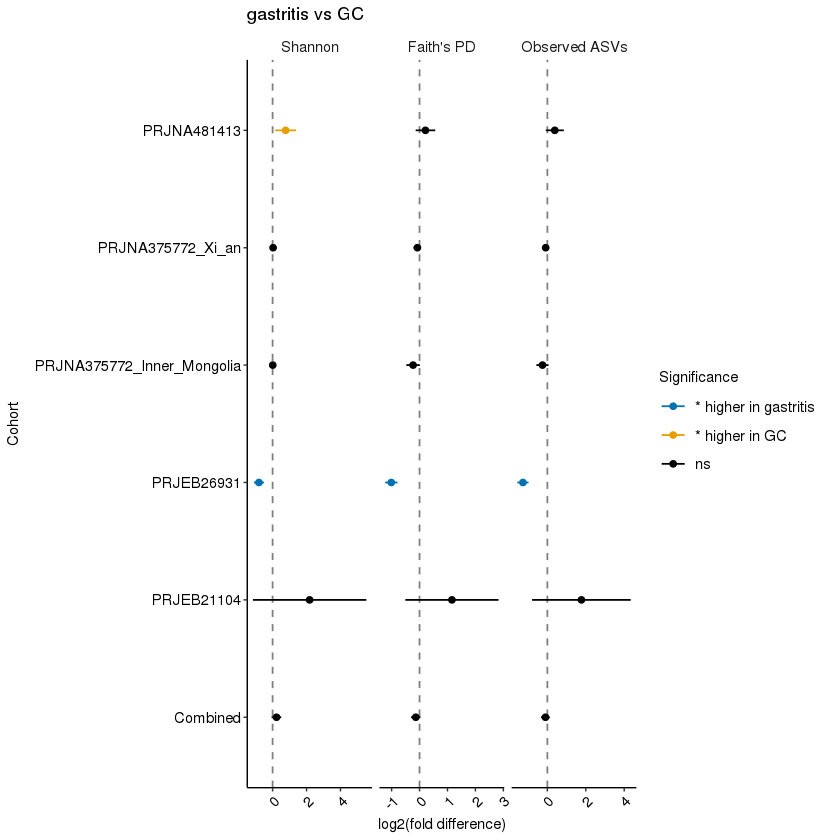

In [49]:
res <- res %>% mutate(Metric = recode(Metric,'shannon'='Shannon',
                     'faith_pd'="Faith's PD",'observed_otus'='Observed ASVs'))

ggplot(res,aes(x=log2FC, y=BioProject, color=Significance)) +  
geom_vline(xintercept = 0, linetype="dashed", color="grey50") +
geom_errorbarh(aes(xmin=CI_low, xmax=CI_high), height=0 ) +
geom_point() +
facet_grid(~Metric, scales="free_x") +
theme_MicrobeR() +
scale_color_manual(values=c(Lcolor, Hcolor, "black"))  +
 theme(panel.border = element_blank(), axis.line = element_line()) +
# theme(axis.text.x=element_text(angle=45, hjust=1,size=7),
#      axis.text = element_text(size = 9,colour = 'black'))+
         labs(title='gastritis vs GC',y='Cohort')+set_front(9)+xlab('log2(fold difference)')
ggsave("figures/gastritis_vs_GC_forestplot_withhp.pdf", device="pdf", height=2.7, width=6.5, useDingbats=F)
write.csv(res,'gastritis_vs_GC_logFC_result_withhp.csv')             


In [51]:
ggc <- res

## IM vs GC

In [52]:
Project<-c('PRJEB21104','PRJEB26931','PRJNA375772_Xi_an',
'PRJNA481413')

In [53]:
Alpha_stat<- function(p){


    As <-list()

    As$md <-subset(md,bioproject==p) %>% subset(Diagnosis=='intestinal_metaplasia'| Diagnosis=='gastric_cancer')

    for (Alpha in alphas){
        min_alpha=min(As$md[which(As$md[Alpha]!=0),Alpha])
        As$md[which(As$md[Alpha]==0),Alpha]<- min_alpha 
    }


    As$alpha_div <- As$md %>%
    as_tibble() %>%  
    gather( key="Metric", value="Diversity",shannon,faith_pd, observed_otus) %>% 
    select(SampleID,BioProject, Diagnosis, Metric, Diversity)
    #alpha_div

    As$alpha_div <- As$alpha_div %>%
    left_join(
        As$alpha_div %>%
        group_by(Metric, Diagnosis) %>%
        summarize(mean=mean(log2(Diversity))) %>%  
       spread(key=Diagnosis, value=mean) %>%
       rename(mean_log2GC=gastric_cancer, mean_log2IM=intestinal_metaplasia) #*
    ) %>%

    mutate(log2FC=log2(Diversity)-mean_log2IM)



    As$AlphaDiversity_Stats <-
    As$alpha_div %>%
    group_by(Metric) %>% 
    do(
      broom::tidy(t.test(log2FC~Diagnosis, data=., conf.int=TRUE, conf.level=0.95))
    ) %>%
    mutate(BioProject= p) %>%
    select(BioProject, Metric, log2FC=estimate, Pvalue=p.value, mean_IM=estimate2, 
           mean_GC=estimate1, CI_low=conf.low, CI_high=conf.high)

    return(As)
}

In [54]:
PerStudy<-list()
  for(p in Project){
    message("--------------------->", p)
    PerStudy[[p]]<-Alpha_stat(p)
  }

--------------------->PRJEB21104

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJEB26931

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJNA375772_Xi_an

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"

--------------------->PRJNA481413

`summarise()` has grouped output by 'Metric'. You can override using the `.groups` argument.

Joining, by = "Metric"



In [55]:
mod<-lapply(PerStudy, function(x) x$alpha_div) %>%
  do.call(bind_rows, .) %>%
  mutate(Diagnosis=factor(Diagnosis, levels=c("intestinal_metaplasia","gastric_cancer"))) %>%
  group_by(Metric)

AlphaCombined<-tibble(BioProject=character(0), Metric=character(0), log2FC=numeric(0), Pvalue=numeric(0), 
                      mean_IM=numeric(0), 
                      mean_GC=numeric(0), CI_low=numeric(0), CI_high=numeric(0))
#AlphaCombined
for(i in unique(mod$Metric)){
  fit<-lmerTest:::lmer(log2FC~Diagnosis+(1|BioProject), data=subset(mod, Metric==i))
  cf<-confint(fit,level = 0.95)
  
  AlphaCombined<-bind_rows(AlphaCombined, tibble(
    BioProject="Combined", 
    Metric=i, 
    log2FC=summary(fit)$coefficients["Diagnosisgastric_cancer", "Estimate"], 
    Pvalue=anova(fit)$`Pr(>F)`,  
    mean_IM=NA, 
    mean_GC=NA, 
    CI_low=cf["Diagnosisgastric_cancer",1], 
    CI_high=cf["Diagnosisgastric_cancer",2]
  ))
}

Computing profile confidence intervals ...

Computing profile confidence intervals ...

Computing profile confidence intervals ...



In [56]:
NSamples<-
  lapply(names(PerStudy), function(x) tibble(BioProject=x, Nsamples=length(unique(PerStudy[[x]]$alpha_div$SampleID)))) %>% 
  do.call(bind_rows, .) %>% 
  arrange(desc(Nsamples)) %>% 
  mutate(Study=paste0(BioProject, " (n=", Nsamples,")")) %>% 
  bind_rows(tibble(BioProject="Combined", Study="Combined")) %>%
  mutate(Study=factor(Study, levels=rev(Study)))
         

res<- lapply(PerStudy, function(x) x$AlphaDiversity_Stats) %>%
do.call(bind_rows, .) %>%
bind_rows(AlphaCombined) %>%
mutate(Significance=case_when(
Pvalue<0.05 & log2FC>0 ~ "* higher in GC",
Pvalue<0.05 & log2FC<0 ~ "* higher in IM",
TRUE~"ns"
)) %>%
ungroup() %>%
mutate(Metric=factor(Metric, levels=alphas))%>%
left_join(NSamples) 

Joining, by = "BioProject"



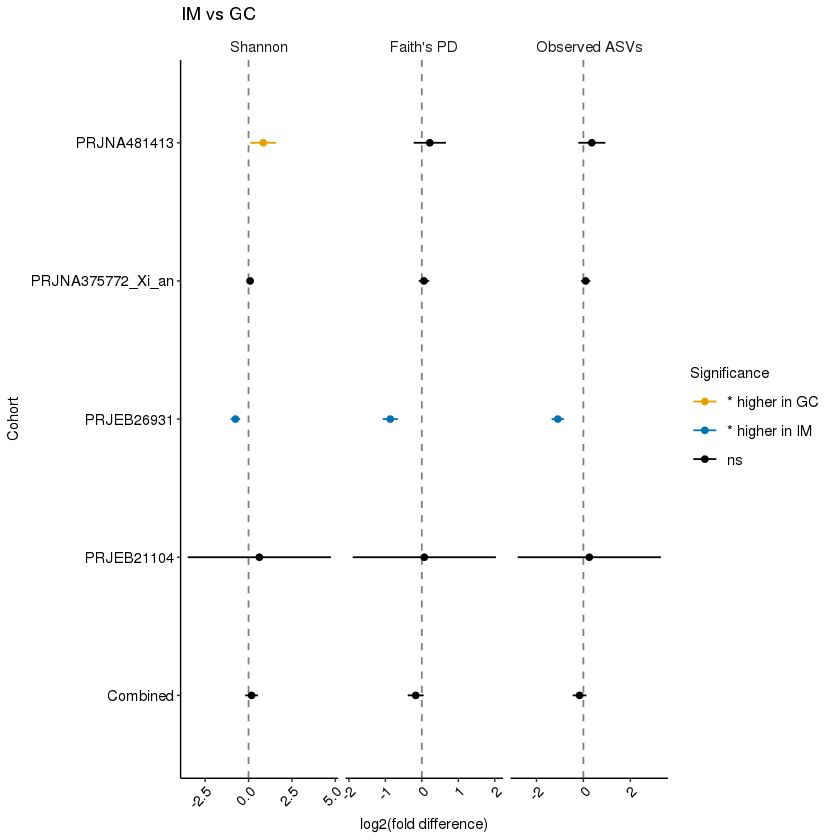

In [57]:
res <- res %>% mutate(Metric = recode(Metric,'shannon'='Shannon',
                     'faith_pd'="Faith's PD",'observed_otus'='Observed ASVs'))

ggplot(res,aes(x=log2FC, y=BioProject, color=Significance)) +  
geom_vline(xintercept = 0, linetype="dashed", color="grey50") +
geom_errorbarh(aes(xmin=CI_low, xmax=CI_high), height=0 ) +
geom_point() +
facet_grid(~Metric, scales="free_x") +
theme_MicrobeR() +
scale_color_manual(values=c( Hcolor, Lcolor,"black"))  +
 theme(panel.border = element_blank(), axis.line = element_line()) +
# theme(axis.text.x=element_text(angle=45, hjust=1,size=7),
#      axis.text = element_text(size = 9,colour = 'black'))+
         labs(title='IM vs GC',y='Cohort')+set_front(9)+xlab('log2(fold difference)')
ggsave("figures/IM_vs_GC_forestplot_withhp.pdf", device="pdf", height=2.8, width=5.9, useDingbats=F)
write.csv(res,'IM_vs_GC_logFC_result_withhp.csv')             


In [58]:
imgc <- res

# combined

In [60]:
hg_c <- hg %>% #subset(BioProject=='Combined') %>% 
select(BioProject,Metric,log2FC,Pvalue,CI_low,CI_high)%>%
mutate(Significance=case_when(
Pvalue<0.01 ~ "**",
Pvalue>0.05 ~ "ns",
TRUE~"*"),Compare_status='Healthy vs. Gastritis')
hg_c

BioProject,Metric,log2FC,Pvalue,CI_low,CI_high,Significance,Compare_status
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PRJEB21104,Faith's PD,-3.07325893,3.476433e-11,-3.6255537,-2.52096414,**,Healthy vs. Gastritis
PRJEB21104,Observed ASVs,-4.79373436,1.031158e-11,-5.5931821,-3.99428661,**,Healthy vs. Gastritis
PRJEB21104,Shannon,-5.85113845,8.907160e-11,-6.9126968,-4.78958012,**,Healthy vs. Gastritis
PRJEB22107,Faith's PD,-0.33323723,3.321939e-01,-1.0686143,0.40213984,ns,Healthy vs. Gastritis
PRJEB22107,Observed ASVs,-0.62911246,2.320040e-01,-1.7298767,0.47165178,ns,Healthy vs. Gastritis
PRJEB22107,Shannon,-0.76567289,3.833594e-01,-2.6802613,1.14891548,ns,Healthy vs. Gastritis
PRJEB26931,Faith's PD,-0.05504591,5.977499e-01,-0.2614608,0.15136902,ns,Healthy vs. Gastritis
PRJEB26931,Observed ASVs,-0.05585266,6.619069e-01,-0.3087443,0.19703903,ns,Healthy vs. Gastritis
PRJEB26931,Shannon,-0.16980484,1.152976e-01,-0.3819048,0.04229514,ns,Healthy vs. Gastritis


In [61]:
hgc_c <- hgc%>% #subset(BioProject=='Combined') %>% 
select(BioProject,Metric,log2FC,Pvalue,CI_low,CI_high)%>%
mutate(Significance=case_when(
Pvalue<0.01 ~ "**",
Pvalue>0.05 ~ "ns",
TRUE~"*"),Compare_status='Healthy vs. GC')
hgc_c

BioProject,Metric,log2FC,Pvalue,CI_low,CI_high,Significance,Compare_status
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PRJEB21104,Faith's PD,-1.913725078,2.660363e-02,-3.54311413,-0.2843360,*,Healthy vs. GC
PRJEB21104,Observed ASVs,-3.021344857,2.412658e-02,-5.53482433,-0.5078654,*,Healthy vs. GC
PRJEB21104,Shannon,-3.669099592,3.207839e-02,-6.93637512,-0.4018241,*,Healthy vs. GC
PRJEB21497,Faith's PD,0.271960900,1.310435e-01,-0.08807381,0.6319956,ns,Healthy vs. GC
PRJEB21497,Observed ASVs,0.475331090,7.576414e-02,-0.05367791,1.0043401,ns,Healthy vs. GC
PRJEB21497,Shannon,0.008523685,9.827865e-01,-0.80033370,0.8173811,ns,Healthy vs. GC
PRJEB26931,Faith's PD,-1.065953500,2.159380e-15,-1.30131075,-0.8305963,**,Healthy vs. GC
PRJEB26931,Observed ASVs,-1.327806075,4.844665e-16,-1.61282539,-1.0427868,**,Healthy vs. GC
PRJEB26931,Shannon,-0.973650583,3.187014e-09,-1.27653121,-0.6707700,**,Healthy vs. GC


In [62]:
gim_c <- gim %>% #subset(BioProject=='Combined') %>% 
select(BioProject,Metric,log2FC,Pvalue,CI_low,CI_high)%>%
mutate(Significance=case_when(
Pvalue<0.01 ~ "**",
Pvalue>0.05 ~ "ns",
TRUE~"*"),Compare_status='Gastritis vs. IM')
gim_c

BioProject,Metric,log2FC,Pvalue,CI_low,CI_high,Significance,Compare_status
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PRJEB21104,Faith's PD,1.091455728,0.12269586,-0.3628695,2.54578097,ns,Gastritis vs. IM
PRJEB21104,Observed ASVs,1.521649569,0.16210138,-0.7552240,3.79852318,ns,Gastritis vs. IM
PRJEB21104,Shannon,1.559556577,0.29580261,-1.6625162,4.78162933,ns,Gastritis vs. IM
PRJEB26931,Faith's PD,-0.145976579,0.09535703,-0.3180856,0.02613243,ns,Gastritis vs. IM
PRJEB26931,Observed ASVs,-0.181308751,0.12276968,-0.4126459,0.05002840,ns,Gastritis vs. IM
PRJEB26931,Shannon,-0.048775039,0.57078536,-0.2194607,0.12191059,ns,Gastritis vs. IM
PRJNA375772_Xi_an,Faith's PD,-0.135821012,0.03338278,-0.2606888,-0.01095326,*,Gastritis vs. IM
PRJNA375772_Xi_an,Observed ASVs,-0.184086046,0.05253142,-0.3702348,0.00206272,ns,Gastritis vs. IM
PRJNA375772_Xi_an,Shannon,-0.061080470,0.41504065,-0.2093192,0.08715829,ns,Gastritis vs. IM


In [63]:
ggc_c <- ggc %>% #subset(BioProject=='Combined') %>% 
select(BioProject,Metric,log2FC,Pvalue,CI_low,CI_high)%>%
mutate(Significance=case_when(
Pvalue<0.01 ~ "**",
Pvalue>0.05 ~ "ns",
TRUE~"*"),Compare_status='Gastritis vs. GC')
ggc_c

BioProject,Metric,log2FC,Pvalue,CI_low,CI_high,Significance,Compare_status
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PRJEB21104,Faith's PD,1.159533854,1.526464e-01,-0.50792485,2.82699256,ns,Gastritis vs. GC
PRJEB21104,Observed ASVs,1.772389501,1.545752e-01,-0.79300276,4.33778176,ns,Gastritis vs. GC
PRJEB21104,Shannon,2.182038854,1.764055e-01,-1.15922424,5.52330195,ns,Gastritis vs. GC
PRJEB26931,Faith's PD,-1.010907592,2.684491e-15,-1.23190242,-0.78991277,**,Gastritis vs. GC
PRJEB26931,Observed ASVs,-1.271953417,2.871942e-14,-1.56351645,-0.98039038,**,Gastritis vs. GC
PRJEB26931,Shannon,-0.803845747,3.349214e-07,-1.09806949,-0.50962201,**,Gastritis vs. GC
PRJNA375772_Inner_Mongolia,Faith's PD,-0.230611798,6.200578e-02,-0.47318657,0.01196297,ns,Gastritis vs. GC
PRJNA375772_Inner_Mongolia,Observed ASVs,-0.253535213,1.155513e-01,-0.57114992,0.06407949,ns,Gastritis vs. GC
PRJNA375772_Inner_Mongolia,Shannon,0.009311609,9.233430e-01,-0.18308289,0.20170611,ns,Gastritis vs. GC


In [64]:
imgc_c <- imgc %>% #subset(BioProject=='Combined') %>% 
select(BioProject,Metric,log2FC,Pvalue,CI_low,CI_high)%>%
mutate(Significance=case_when(
Pvalue<0.01 ~ "**",
Pvalue>0.05 ~ "ns",
TRUE~"*"),Compare_status='IM vs. GC')
imgc_c

BioProject,Metric,log2FC,Pvalue,CI_low,CI_high,Significance,Compare_status
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PRJEB21104,Faith's PD,0.06807813,9.417351e-01,-1.89445334,2.03060959,ns,IM vs. GC
PRJEB21104,Observed ASVs,0.25073993,8.626351e-01,-2.80099544,3.30247530,ns,IM vs. GC
PRJEB21104,Shannon,0.62248228,7.508179e-01,-3.50077411,4.74573867,ns,IM vs. GC
PRJEB26931,Faith's PD,-0.86493101,1.197635e-13,-1.07094962,-0.65891241,**,IM vs. GC
PRJEB26931,Observed ASVs,-1.09064467,3.430974e-13,-1.35668659,-0.82460275,**,IM vs. GC
PRJEB26931,Shannon,-0.75507071,3.765988e-07,-1.03098077,-0.47916064,**,IM vs. GC
PRJNA375772_Xi_an,Faith's PD,0.05827730,4.200407e-01,-0.08484121,0.20139580,ns,IM vs. GC
PRJNA375772_Xi_an,Observed ASVs,0.09606680,3.334383e-01,-0.10044647,0.29258007,ns,IM vs. GC
PRJNA375772_Xi_an,Shannon,0.09000990,2.217473e-01,-0.05548392,0.23550371,ns,IM vs. GC


In [65]:
con <- rbind(hg_c,hgc_c,gim_c,ggc_c,imgc_c)
con

BioProject,Metric,log2FC,Pvalue,CI_low,CI_high,Significance,Compare_status
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PRJEB21104,Faith's PD,-3.073258933,3.476433e-11,-3.62555373,-2.52096414,**,Healthy vs. Gastritis
PRJEB21104,Observed ASVs,-4.793734358,1.031158e-11,-5.59318210,-3.99428661,**,Healthy vs. Gastritis
PRJEB21104,Shannon,-5.851138447,8.907160e-11,-6.91269677,-4.78958012,**,Healthy vs. Gastritis
PRJEB22107,Faith's PD,-0.333237229,3.321939e-01,-1.06861430,0.40213984,ns,Healthy vs. Gastritis
PRJEB22107,Observed ASVs,-0.629112455,2.320040e-01,-1.72987669,0.47165178,ns,Healthy vs. Gastritis
PRJEB22107,Shannon,-0.765672894,3.833594e-01,-2.68026127,1.14891548,ns,Healthy vs. Gastritis
PRJEB26931,Faith's PD,-0.055045908,5.977499e-01,-0.26146083,0.15136902,ns,Healthy vs. Gastritis
PRJEB26931,Observed ASVs,-0.055852658,6.619069e-01,-0.30874435,0.19703903,ns,Healthy vs. Gastritis
PRJEB26931,Shannon,-0.169804835,1.152976e-01,-0.38190481,0.04229514,ns,Healthy vs. Gastritis


In [66]:
con$Compare.disease.status<-factor(con$Compare_status,levels=c('IM vs. GC','Gastritis vs. GC','Gastritis vs. IM','Healthy vs. GC','Healthy vs. Gastritis'))

In [67]:
# con <- con %>% mutate(Metric = recode(Metric,'shannon'='Shannon',
#                      'faith_pd'="Faith's PD",'observed_otus'='Observed ASVs'))

In [68]:
names(con)[names(con) == 'Pvalue'] <- 'pvalue'
con <- con %>% mutate(Pvalue = recode(Significance,'*'='P <0.05','**'='P < 0.01'))

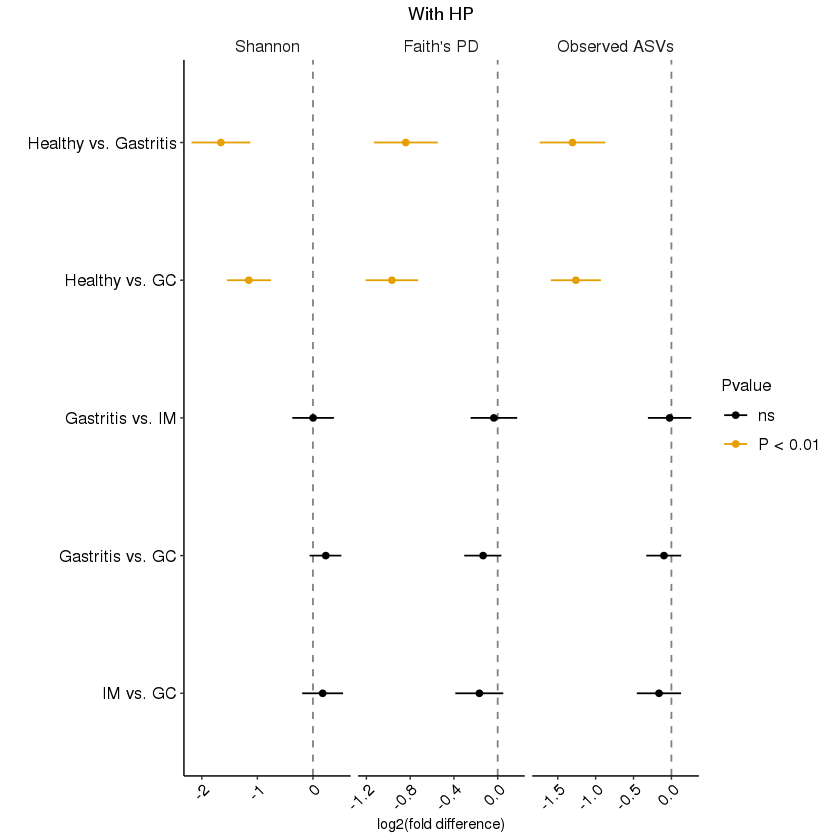

In [69]:
ggplot(subset(con,BioProject=='Combined'),aes(x=log2FC, y=Compare.disease.status, color=Pvalue)) +  
geom_vline(xintercept = 0, linetype="dashed", color="grey50") +
geom_errorbarh(aes(xmin=CI_low, xmax=CI_high), height=0 ) +
geom_point() +
facet_grid(~Metric, scales="free_x") +
theme_MicrobeR() +
scale_color_manual(values=c("black",Hcolor ))  +
theme(panel.border = element_blank(), axis.line = element_line()) +
# theme(axis.text.x=element_text(angle=45, hjust=1,size=7),
#       axis.text = element_text(size = 9,colour = 'black'))
 ylab('') +set_front(10)+xlab('log2(fold difference)')+
#xlim(-2.3,1)+
labs(title='With HP')+theme(plot.title = element_text(hjust = 0.5))
             
ggsave("figures/conbine_withhp.pdf", device="pdf", height=4, width=6, useDingbats=F)